In [119]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [72]:
data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [73]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [74]:
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [75]:
data.dropna(subset=["Sale Price","Zipcode"],inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21608 non-null  int64  
 1   Date House was Sold                        21608 non-null  object 
 2   Sale Price                                 21608 non-null  float64
 3   No of Bedrooms                             21608 non-null  int64  
 4   No of Bathrooms                            21604 non-null  float64
 5   Flat Area (in Sqft)                        21599 non-null  float64
 6   Lot Area (in Sqft)                         21599 non-null  float64
 7   No of Floors                               21608 non-null  float64
 8   Waterfront View                            21608 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [77]:
from sklearn.impute import SimpleImputer

In [78]:
data.select_dtypes("float64").columns

Index(['Sale Price', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)'],
      dtype='object')

In [79]:
numerical_features=[ 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 
       'Area of the House from Basement (in Sqft)', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)']

In [80]:

imputer=SimpleImputer(strategy="mean")

arr=imputer.fit_transform(data[numerical_features])

In [81]:
data[numerical_features]=arr

In [82]:
data["No of Bathrooms"].fillna(method="bfill",inplace=True)

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_4080\4181855451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["No of Bathrooms"].fillna(method="bfill",inplace=True)
C:\Users\PAWAN\AppData\Local\Temp\ipykernel_4080\4181855451.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["No of Bathrooms"].fillna(method="bfill",inplace=True)


In [83]:
data.drop(columns=["No of Times Visited"],inplace=True)

In [84]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [85]:
data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [86]:
def luxary(row):
    count=0
    if row[0]>7:
        count +=1
    if row[1]=="Yes":
        count+=1
    if row[2] in ['Excellent', 'Good']:
        count+=1
    if count>=2:
        return "Yes"
    else:
        return "No"
        
    
    
data["Luxary"]=data[["Overall Grade","Waterfront View","Condition of the House"]].apply(luxary,axis=1)

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_4080\2813292635.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0]>7:
C:\Users\PAWAN\AppData\Local\Temp\ipykernel_4080\2813292635.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1]=="Yes":
C:\Users\PAWAN\AppData\Local\Temp\ipykernel_4080\2813292635.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[2] in ['Excellent', 'Good']:


In [87]:
def year(value):
    return value.split()[-1]

data["Date House was Sold"]=data["Date House was Sold"].map(year)

In [88]:
data.head(3)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Luxary
0,7129300520,2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No
2,5631500400,2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No


In [89]:
data["Date House was Sold"]=data["Date House was Sold"].astype("int64")

In [90]:
data["Year since renovated"]=np.where(data["Renovated Year"]==0,0,abs(data["Date House was Sold"]-data["Renovated Year"]))

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21608 non-null  int64  
 1   Date House was Sold                        21608 non-null  int64  
 2   Sale Price                                 21608 non-null  float64
 3   No of Bedrooms                             21608 non-null  int64  
 4   No of Bathrooms                            21608 non-null  float64
 5   Flat Area (in Sqft)                        21608 non-null  float64
 6   Lot Area (in Sqft)                         21608 non-null  float64
 7   No of Floors                               21608 non-null  float64
 8   Waterfront View                            21608 non-null  object 
 9   Condition of the House                     21608 non-null  object 
 10  Overall Grade              

checking skewness

In [92]:
from scipy.stats import skew

for i in (data.drop(columns=["Sale Price","ID",'Waterfront View', 'Condition of the House', 'Luxary']).columns):
    
    skewness=skew(data[i])
    
    if skewness >0:
        data[i]=np.sqrt(data[i])
    elif skewness <0:
        data[i]=np.square(data[i])
    

C:\Users\PAWAN\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [93]:
zipcode = pd.DataFrame(data.groupby("Zipcode")["Sale Price"].mean().sort_values())


In [94]:
zipcode

,Sale Price
Zipcode,
313.052711,2.342840e+05
313.317730,2.403284e+05
313.100623,2.512962e+05
313.051114,2.808047e+05
313.285812,2.849086e+05
...,...
313.212388,9.015162e+05
313.228351,1.096239e+06
313.113398,1.194874e+06


In [95]:
zipcode["Zipcode"]=pd.cut(zipcode["Sale Price"],bins=10,labels=["zipcode_group_0",
                                                                "zipcode_group_1",
                                                                "zipcode_group_2",
                                                                "zipcode_group_3",
                                                                "zipcode_group_4",
                                                                "zipcode_group_5",
                                                                "zipcode_group_6",
                                                                "zipcode_group_7",
                                                                "zipcode_group_8",
                                                                "zipcode_group_9"],
                          include_lowest=True)

In [96]:
zipcode

,Sale Price,Zipcode
Zipcode,,
313.052711,2.342840e+05,zipcode_group_0
313.317730,2.403284e+05,zipcode_group_0
313.100623,2.512962e+05,zipcode_group_0
313.051114,2.808047e+05,zipcode_group_0
313.285812,2.849086e+05,zipcode_group_0
...,...,...
313.212388,9.015162e+05,zipcode_group_3
313.228351,1.096239e+06,zipcode_group_4
313.113398,1.194874e+06,zipcode_group_4


In [97]:
data=pd.merge(left=data,
         right=zipcode,
         left_on="Zipcode",
        how="left",
        right_index=True
         )

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Zipcode                                    21608 non-null  float64 
 1   ID                                         21608 non-null  int64   
 2   Date House was Sold                        21608 non-null  int64   
 3   Sale Price_x                               21608 non-null  float64 
 4   No of Bedrooms                             21608 non-null  float64 
 5   No of Bathrooms                            21608 non-null  float64 
 6   Flat Area (in Sqft)                        21608 non-null  float64 
 7   Lot Area (in Sqft)                         21608 non-null  float64 
 8   No of Floors                               21608 non-null  float64 
 9   Waterfront View                            21608 non-null  object  
 10  Condition of th

In [99]:
data.head(3)

,Zipcode,ID,Date House was Sold,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,...,Renovated Year,Zipcode_x,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Luxary,Year since renovated,Sale Price_y,Zipcode_y
0,313.333688,7129300520,4068289,221900.0,1.732051,1.0,34.351128,75.166482,1.000000,No,...,0.000000,313.333688,2257.314125,NaN,36.606010,75.166482,No,0.00000,310612.755725,zipcode_group_0
1,313.249102,6414100192,4068289,538000.0,1.732051,1.5,50.695167,85.099941,1.414214,No,...,44.620623,313.249102,2277.293841,NaN,41.109610,87.401373,No,5.09902,469485.039024,zipcode_group_1
2,313.094235,5631500400,4064256,180000.0,1.414214,1.0,27.748874,100.000000,1.000000,No,...,0.000000,313.094235,2278.907096,NaN,52.153619,89.788641,No,0.00000,462488.869258,zipcode_group_1


In [100]:
data.rename(columns={"Sale Price_x":"Sale Price"},inplace=True)

In [101]:
data.drop(columns=["Sale Price_y","Zipcode_x"],inplace=True)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Zipcode                                    21608 non-null  float64 
 1   ID                                         21608 non-null  int64   
 2   Date House was Sold                        21608 non-null  int64   
 3   Sale Price                                 21608 non-null  float64 
 4   No of Bedrooms                             21608 non-null  float64 
 5   No of Bathrooms                            21608 non-null  float64 
 6   Flat Area (in Sqft)                        21608 non-null  float64 
 7   Lot Area (in Sqft)                         21608 non-null  float64 
 8   No of Floors                               21608 non-null  float64 
 9   Waterfront View                            21608 non-null  object  
 10  Condition of th

In [103]:
q1=data["Sale Price"].quantile(0.25)
q3=data["Sale Price"].quantile(0.75)
(q1,q3)

(np.float64(321837.5), np.float64(645000.0))

In [104]:
iqr=q3-q1
iqr

np.float64(323162.5)

In [105]:


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

(upper_bound,lower_bound)

(np.float64(1129743.75), np.float64(-162906.25))

In [106]:
data["Sale Price"].max()

np.float64(7700000.0)

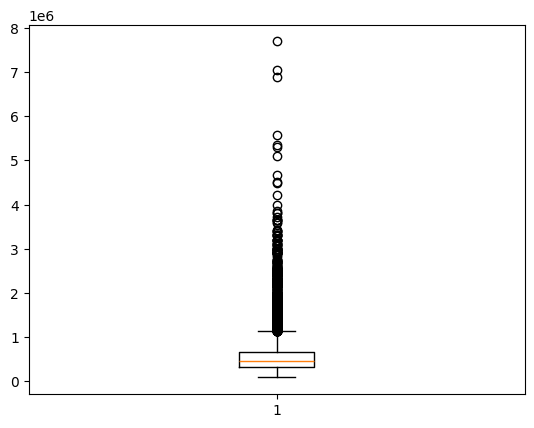

In [107]:
plt.boxplot(data["Sale Price"])
plt.show()

In [108]:
data["Sale Price"].describe()

count    2.160800e+04
mean     5.401938e+05
std      3.673969e+05
min      7.500000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [109]:
data["Sale Price"]

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, Length: 21608, dtype: float64

handlin outliers 

In [110]:
def outliers(value):
    
    if value > upper_bound:
        return upper_bound
    elif value <lower_bound:
        return lower_bound
    else:
        return value
    
    
data["Sale Price"]=data["Sale Price"].map(outliers)

In [111]:
data["Sale Price"].max()

np.float64(1129743.75)

In [112]:
data=pd.get_dummies(data,columns=["Waterfront View","Condition of the House","Luxary","Zipcode_y"], drop_first=True)

In [113]:
data.drop(columns=["Renovated Year","Date House was Sold","Zipcode","ID"],inplace=True)


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21608 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21608 non-null  float64
 1   No of Bedrooms                             21608 non-null  float64
 2   No of Bathrooms                            21608 non-null  float64
 3   Flat Area (in Sqft)                        21608 non-null  float64
 4   Lot Area (in Sqft)                         21608 non-null  float64
 5   No of Floors                               21608 non-null  float64
 6   Overall Grade                              21608 non-null  float64
 7   Area of the House from Basement (in Sqft)  21608 non-null  float64
 8   Basement Area (in Sqft)                    21608 non-null  float64
 9   Age of House (in Years)                    21608 non-null  float64
 10  Latitude                   

defining X and Y

In [115]:
x=data.iloc[:,1:]
y=data["Sale Price"]

In [116]:
high_corr=[]

for i in x.columns:
    for j in x.columns:
        if i !=j:
            if abs(x[i].corr(x[j])) > 0.85:
                if j not in high_corr:
                    high_corr.append(j)
         
            
high_corr        
 

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


['Area of the House from Basement (in Sqft)',
 'Lot Area after Renovation (in Sqft)',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)']

In [126]:
x1=x.drop(columns=['Area of the House from Basement (in Sqft)', 'Flat Area (in Sqft)','Lot Area after Renovation (in Sqft)','Lot Area (in Sqft)',"Longitude"])

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [127]:
x1.isnull().sum()

No of Bedrooms                            0
No of Bathrooms                           0
No of Floors                              0
Overall Grade                             0
Basement Area (in Sqft)                   0
Age of House (in Years)                   0
Latitude                                  0
Living Area after Renovation (in Sqft)    0
Year since renovated                      0
Waterfront View_Yes                       0
Condition of the House_Excellent          0
Condition of the House_Fair               0
Condition of the House_Good               0
Condition of the House_Okay               0
Luxary_Yes                                0
Zipcode_y_zipcode_group_1                 0
Zipcode_y_zipcode_group_2                 0
Zipcode_y_zipcode_group_3                 0
Zipcode_y_zipcode_group_4                 0
Zipcode_y_zipcode_group_5                 0
Zipcode_y_zipcode_group_6                 0
Zipcode_y_zipcode_group_7                 0
Zipcode_y_zipcode_group_8       

In [153]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y_train,y_test=train_test_split(x1,y,train_size=0.8,random_state=72)

In [154]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [155]:
model.fit(x1_train,y_train)

LinearRegression()

In [156]:
model.score(x1_test,y_test)

0.7892987579174306

In [144]:
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.pop("Longitude")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
21603   NaN
21604   NaN
21605   NaN
21606   NaN
21607   NaN
Name: Longitude, Length: 21608, dtype: float64

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=72)

In [151]:
model1=LinearRegression()

model1.fit(x_train,y_train)

LinearRegression()

In [152]:
model1.score(x_test,y_test)

0.8119621164029659

In [157]:
model1.score(x_train,y_train)

0.8045768540488722